**1.1 Download Data**

In [72]:
import os
import sys

# Add src path
sys.path.append(os.path.abspath(os.path.join('..', '..', 'src')))

# Import the download function for CO2 (OurWorldinData) and GDP per Capita (WDI) 
from f_download_PradanaErlanggaGilang import download_OurWorldData, download_worldbank

In [73]:
# Call function CO2 data
data_CO2 = download_OurWorldData()

# Preview
data_CO2.head()

,Entity,Code,Year,emissions_total_per_capita
0,Andorra,AND,2000,7.980626
1,Andorra,AND,2001,7.959651
2,Andorra,AND,2002,7.992899
3,Andorra,AND,2003,7.701912
4,Andorra,AND,2004,7.545487


In [74]:
# call function GDP per capita
data_GDP = download_worldbank()

# Preview
data_GDP.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"GDP per capita, PPP (constant 2021 internation...",Andorra,AND,2023,64631.296391,NaN,NaN,0
1,"GDP per capita, PPP (constant 2021 internation...",Andorra,AND,2022,63913.383508,NaN,NaN,0
2,"GDP per capita, PPP (constant 2021 internation...",Andorra,AND,2021,59332.202910,NaN,NaN,0
3,"GDP per capita, PPP (constant 2021 internation...",Andorra,AND,2020,55488.490299,NaN,NaN,0
4,"GDP per capita, PPP (constant 2021 internation...",Andorra,AND,2019,63215.899792,NaN,NaN,0


**1.2 Manipulate Data**

In [ ]:
# Import the manipulation function
from f_manipulation_PradanaErlanggaGilang import rename_co2_columns, clean_gdp_data

# call rename function
data_CO2_clean = rename_co2_columns(data_CO2)

# preview
data_CO2_clean.head()


,country,ISO3,year,co2_per_capita
0,Andorra,AND,2000,7.980626
1,Andorra,AND,2001,7.959651
2,Andorra,AND,2002,7.992899
3,Andorra,AND,2003,7.701912
4,Andorra,AND,2004,7.545487


In [ ]:
# call cleaning function
data_GDP_clean = clean_gdp_data(data_GDP)

# preview
data_GDP_clean.head()


,country,ISO3,year,gdp_per_capita
0,Andorra,AND,2000,54809.144168
1,Andorra,AND,2001,59109.013681
2,Andorra,AND,2002,61188.637085
3,Andorra,AND,2003,63656.195833
4,Andorra,AND,2004,64353.485811


**1.3 Merge Data**

In [ ]:
# Merge data
merged_data = pd.merge(
    data_GDP_clean,
    data_CO2_clean,
    on=["country", "ISO3", "year"],
    how="inner"  
)

# Preview the merged data
merged_data.head()


,country,ISO3,year,gdp_per_capita,co2_per_capita
0,Andorra,AND,2000,54809.144168,7.980626
1,Andorra,AND,2001,59109.013681,7.959651
2,Andorra,AND,2002,61188.637085,7.992899
3,Andorra,AND,2003,63656.195833,7.701912
4,Andorra,AND,2004,64353.485811,7.545487


<Axes: >

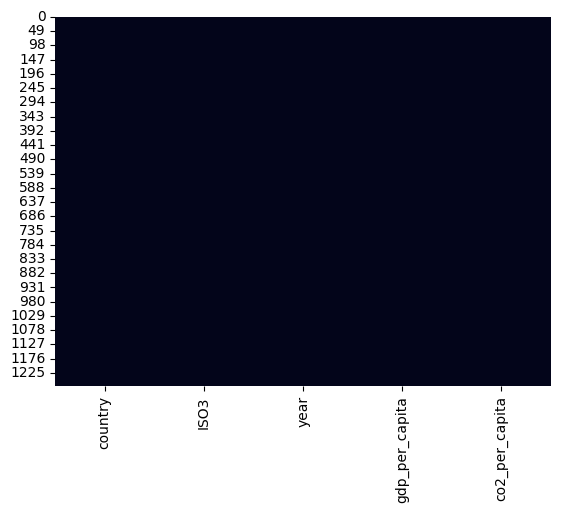

In [79]:
# Show missing in heatmap
import seaborn as sns
sns.heatmap(merged_data.isna(), cbar=False)